In [393]:
## Importing all the necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [394]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Data loading & Preprocessing

In [395]:
## Import the file here
data = pd.read_csv('Data Science - Intern - Data Set.csv')

In [396]:
##check the top 5 data rows
data.head()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,intakeairtemp,engineoiltemp,imap,vehiclespeed,warmups,rpm,obddistance,maf,fuelrail,runtime,mil,obdstandards,telltale,pto_drive_engagement,engine_torque_percent,service_distance,gross_combination_vehicle_weight,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vehicle_weight,air_suspension_pressure_front_axle_left,air_suspension_pressure_front_axle_right,air_suspension_pressure_rear_axle_left,air_suspension_pressure_rear_axle_right,state_of_charge,battery_pack_voltage,battery_pack_current,power,pluscode,lamp_status,hydraulic_oil_filter,air_filter,no_charging,low_fuel,engine_temp_high,hydraulic_oil_temp_high,water_in_fuel,low_oil_pressure,roller_speed,vibration_status,axle_position,tire_position,tire_pressure,tire_temperature,tire_air_leakage_rate,tire_sensor_enable_status,tire_status,tire_sensor_electric_fault,extended_tire_pressure_support,tire_pressure_threshold_detection,extended_tire_pressure,cpc_system_type,required_tire_pressure,cpc_tire_id,cpc_graphical_position,cpc_tire_location,cpc_ttm_id,barometric_pressure,secondary_air_status,catalyst_temperature_bank1_sensor1,catalyst_temperature_bank1_sensor2,distance_since_mil,commanded_egr,egr_error,drive_cycle_status,ambient_air_temperature,fuel_system_status,short_term_fuel_trim_bank_1,long_term_fuel_trim_bank_1,timing_advance,oxygen_sensors_present,oxygen_sensor_1_voltage,oxygen_sensor_2_voltage,commanded_evaporative_purge,control_module_voltage,absolute_load_value,relative_throttle_position,oxygen_sensor_1_short_term_fuel_trim,oxygen_sensor_2_short_term_fuel_trim,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,engine_airlet_pressure,engine_oil_pressure,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,engine_pto_switch_status,clientid,alerttype,alertvalue,from_ts,to_ts,server_ts,to_lat,to_lng,tripid,alert_completed,view_status,scheduled_start_loc,scheduled_end_loc,vehiclenumber,areaandroute,type,breached_in_userid,alerted_to_in_userid,breached_out_userid,alerted_to_out_userid,alert_generated_by_app_userid,alert_ended_by_app_userid,request_id,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,NaN,1774.9688,NaN,0.00000,NaN,749.000,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,21,NaN,NaN,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,102,215,NaN,NaN,0,1,102,Released,Released,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,NaN,1774.9688,NaN,0.00000,NaN,1208.375,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,18,NaN,NaN,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,102,215,NaN,NaN,19,2,102,Released,Pressed,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,NaN,1774.9688,NaN,1.40625,NaN,752.625,60780800,NaN,NaN,1

In [397]:
## here it is showing the no. of rows and columns
data.shape

(18434, 141)

In [398]:
## cleaning the columns and removing the null or NA value columns
clean_data= data
clean_data= clean_data.dropna(axis=1 , how="all")
clean_data.isnull().sum()

uniqueid                                   0
ts                                         0
lat                                        0
lng                                        0
engineload                                 0
coolant                                    0
engineoiltemp                              0
vehiclespeed                               0
rpm                                        0
obddistance                                0
runtime                                   14
engine_torque_percent                      0
selected_gear                              0
current_gear                               0
fuel_consumption                           0
fuel_level                                 2
fl_level                                   0
fuel_rate                                  0
fuel_economy                               0
accelerator_pedal_pos                      0
pluscode                                   0
vibration_status                           0
can_raw_da

In [399]:
# here we ll replace the missing values with mean, because thier are no outliers in these columns values
clean_data['runtime'] = clean_data['runtime'].fillna(clean_data['runtime'].mean().round())
clean_data['fuel_level'] = clean_data['fuel_level'].fillna(clean_data['fuel_level'].mean().round())
clean_data['adblue_level'] = clean_data['adblue_level'].fillna(clean_data['adblue_level'].mean().round())

In [400]:
## check the duplicate values 
duplicate =clean_data.duplicated().sum()
duplicate

0

In [401]:
clean_data.shape

(18434, 33)

In [402]:
## here we are going to delete the column and data that are not required 
final_data=clean_data
final_data = clean_data.drop(columns = ['pluscode','uniqueid','selected_gear','engineoiltemp','engine_throttle_valve2_pos','enginefueltemp','accelerator_pedal_pos_2',
'vibration_status','can_raw_data'], axis=1)

In [403]:
final_data.shape


(18434, 24)

In [404]:
final_data.dtypes

ts                                        int64
lat                                     float64
lng                                     float64
engineload                                int64
coolant                                   int64
vehiclespeed                            float64
rpm                                     float64
obddistance                               int64
runtime                                 float64
engine_torque_percent                     int64
current_gear                              int64
fuel_consumption                        float64
fuel_level                              float64
fl_level                                float64
fuel_rate                               float64
fuel_economy                            float64
accelerator_pedal_pos                   float64
engine_throttle_valve1_pos              float64
drivers_demand_engine_torque_percent      int64
engine_torque_mode                        int64
brake_switch_status                     

In [405]:
## here we are checking the data types of the columns
column_data_types = clean_data.dtypes
print(column_data_types)
clean_data.shape
final_data.head()

uniqueid                                 object
ts                                        int64
lat                                     float64
lng                                     float64
engineload                                int64
coolant                                   int64
engineoiltemp                           float64
vehiclespeed                            float64
rpm                                     float64
obddistance                               int64
runtime                                 float64
engine_torque_percent                     int64
selected_gear                             int64
current_gear                              int64
fuel_consumption                        float64
fuel_level                              float64
fl_level                                float64
fuel_rate                               float64
fuel_economy                            float64
accelerator_pedal_pos                   float64
pluscode                                

,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,1709340731,19.069340,78.355148,28,33,0.00000,749.000,60780800,1970.85,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,100.0,0,1,Released,Released,Pressed,85.0
1,1709340794,19.069347,78.355141,22,41,0.00000,1208.375,60780800,1970.85,18,0,17935.5,23.6,86.14,6.45,0.000000,23.6,99.6,19,2,Released,Pressed,Pressed,85.0
2,1709340857,19.069414,78.355179,25,48,1.40625,752.625,60780800,1970.85,18,129,17936.0,22.8,83.22,4.70,0.337891,0.0,99.6,0,1,Pressed,Pressed,Released,85.0
3,1709340920,19.069258,78.355225,35,52,2.81250,996.375,60780820,1970.90,27,129,17936.0,20.4,74.46,8.60,0.121094,33.6,99.6,28,2,Released,Pressed,Released,85.0
4,1709340983,19.069094,78.355339,0,57,4.53125,1065.750,60780840,1970.90,1,3,17936.0,23.2,84.68,0.00,125.500000,3.2,100.0,1,2,Released,Pressed,Released,85.0


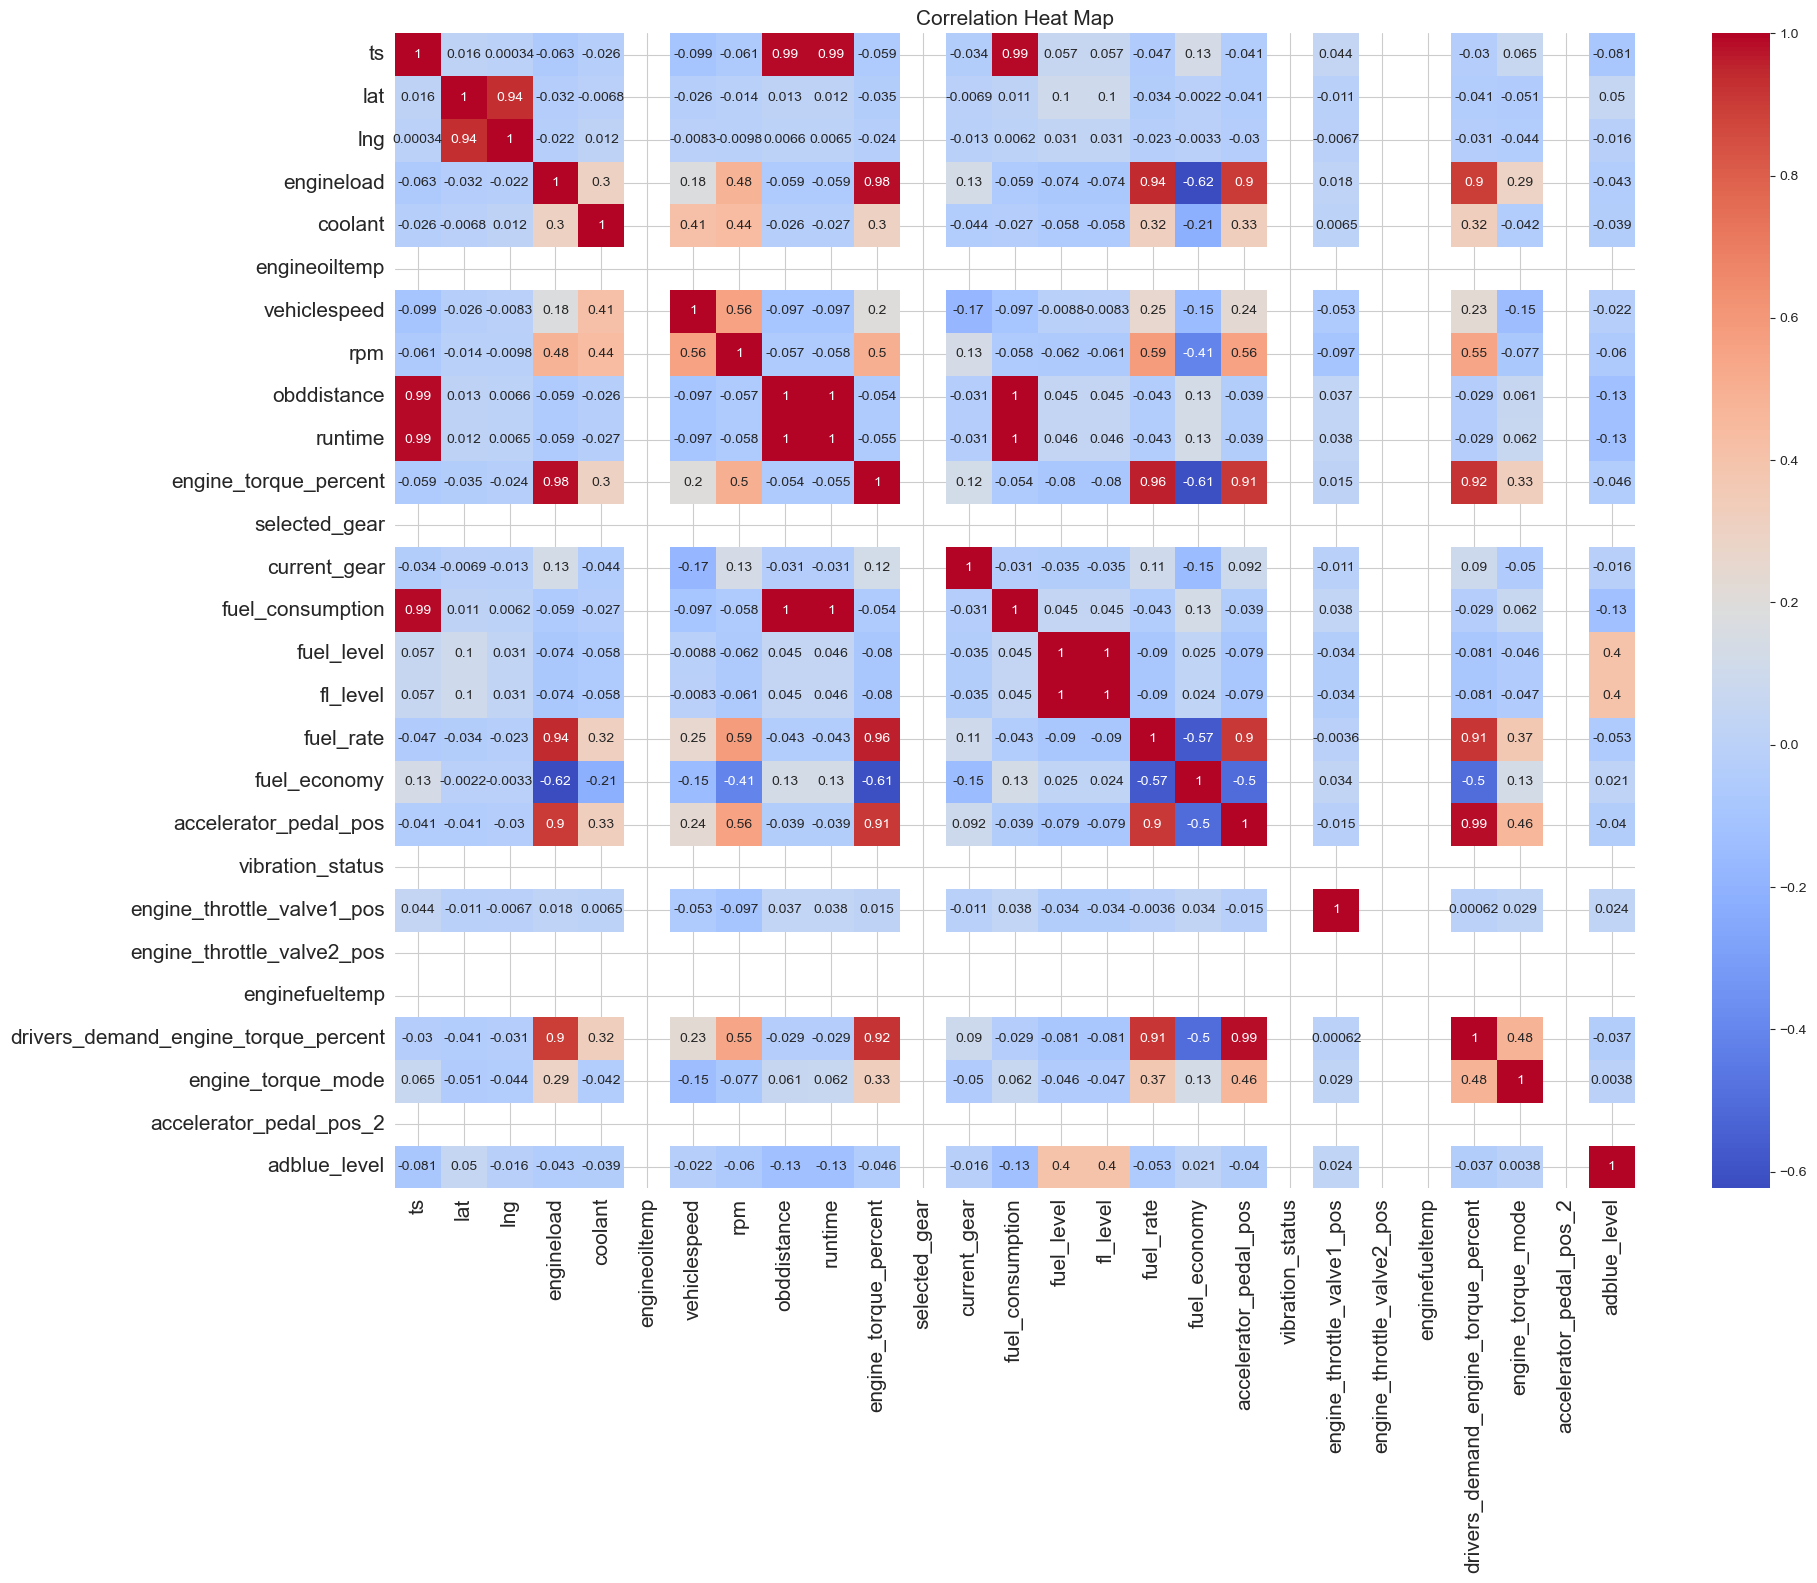

In [406]:
## Heat Map according to clean data
plt.figure(figsize=(20,15))
sns.heatmap(clean_data[num_cols].corr(), annot = True, cmap='coolwarm')
plt.title('Correlation Heat Map', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

This Heat Map only contain the columns that donot have any null or NA values in there coulmn. It shows the relationship between all the columns. The box that show the value more than 0 have positive co-relationship and the value in the box that are less then 0 are negative co-relationships.All the values in blue color are nagative co-relationships and the values in red color are positive co-relationships

In [407]:
## here we are handleing the outliers
Q1 = final_data['fuel_rate'].quantile(0.25)
Q2 = final_data['engineload'].quantile(0.25)
Q3 = final_data['fuel_rate'].quantile(0.75)
Q4 = final_data['engineload'].quantile(0.75)
IQR = Q3 - Q1
IQR2 = Q4 - Q2
fr_outliers = final_data[(final_data['fuel_rate']< (Q1 -1.5*IQR)) | (final_data['fuel_rate'] > (Q3 + 1.5 * IQR))]
el_outliers = final_data[(final_data['engineload']< (Q2 -1.5*IQR)) | (final_data['engineload'] > (Q4 + 1.5 * IQR2))]

## Remove outliers

final_data= final_data[~((final_data['fuel_rate']<(Q1 - 1.5 * IQR)) | (final_data['fuel_rate'] > (Q3 + 1.5 * IQR)))]
final_data= final_data[~((final_data['engineload']<(Q2 - 1.5 * IQR)) | (final_data['engineload'] > (Q4 + 1.5 * IQR)))]
print('N0. of outliers in fuel_rate:', fr_outliers.shape[0])
print('N0. of outliers in engineload:', el_outliers.shape[0])

N0. of outliers in fuel_rate: 0
N0. of outliers in engineload: 0


In [408]:
## here we are creating new variable for numeric data only
num_cols = clean_data.select_dtypes(include=['float64', 'int64']).columns

# Correlation HeatMap

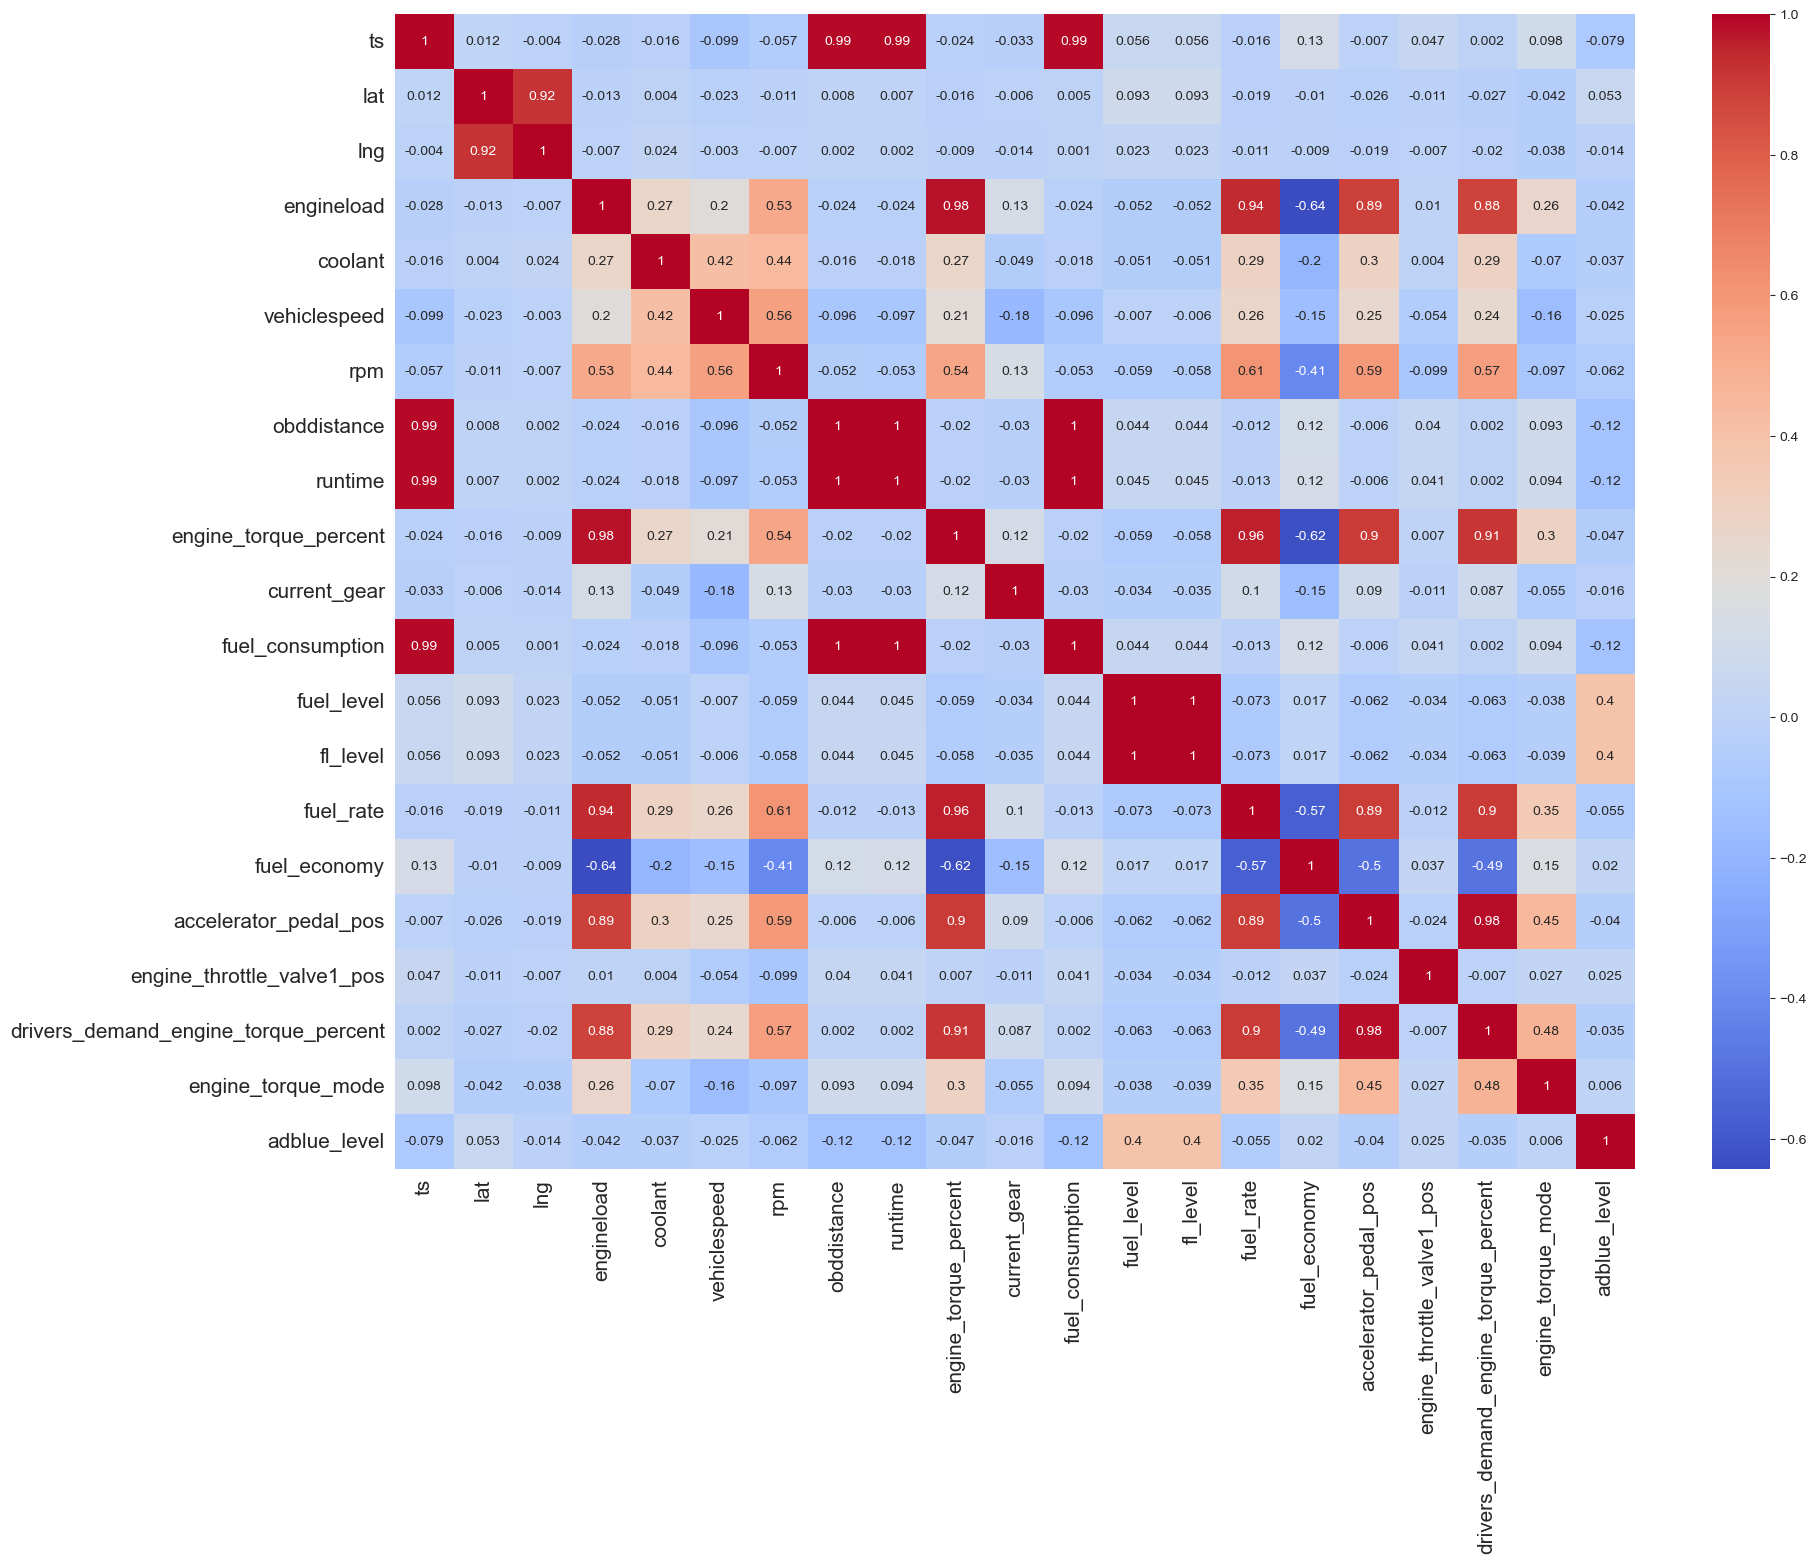

In [409]:
##Heat Map according to finalExploratory data analysis data
num_col1 = final_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(20,15))
co_relation=round(final_data[num_col1].corr(),3)
sns.heatmap(co_relation, annot = True, cmap='coolwarm')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In this Heat Map we have all the necessary columnsthat are left. It shows the relationship between all the columns and help us to identify patterns, correlations, and outliers in the data.

In [410]:
num_col1

['ts',
 'lat',
 'lng',
 'engineload',
 'coolant',
 'vehiclespeed',
 'rpm',
 'obddistance',
 'runtime',
 'engine_torque_percent',
 'current_gear',
 'fuel_consumption',
 'fuel_level',
 'fl_level',
 'fuel_rate',
 'fuel_economy',
 'accelerator_pedal_pos',
 'engine_throttle_valve1_pos',
 'drivers_demand_engine_torque_percent',
 'engine_torque_mode',
 'adblue_level']

# Exploratory data analysis 

Text(0, 0.5, 'fuel_rate')

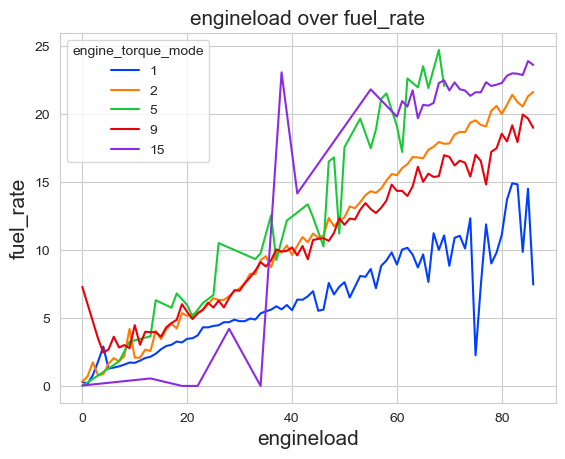

In [411]:
sns.lineplot(data=final_data, x='engineload', y='fuel_rate', hue='engine_torque_mode', palette='bright',errorbar=None)
plt.title('engineload over fuel_rate', fontsize=15)
plt.xlabel('engineload',fontsize=15)
plt.ylabel('fuel_rate', fontsize=15)

This relationship graph shows that the fuel_rate is increasing if the driver is applying more acceleration that is leading to increase the engineload and we have tested it in all 5 engine torque modes.

Bivariate analysis

Text(0, 0.5, 'fuel_rate')

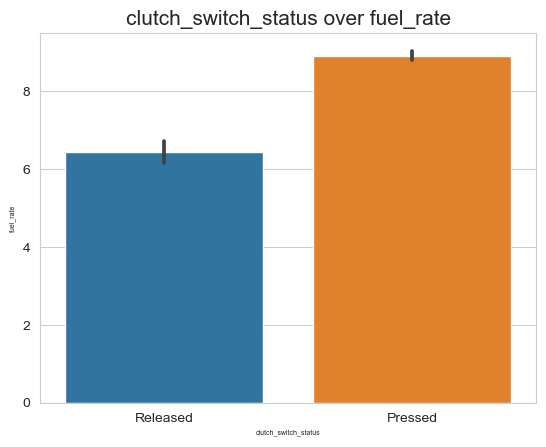

In [412]:
##sns.boxplot(x='fuel_rate',y='clutch_status')
sns.barplot(data=final_data, x='clutch_switch_status', y='fuel_rate')
plt.title('clutch_switch_status over fuel_rate', fontsize=15)
plt.xlabel('clutch_switch_status',fontsize=5)
plt.ylabel('fuel_rate', fontsize=5)

This relationship graph shows that when the driver is releasing the clutch the fuel consumption goes down and it leads to less fuel rate and if the clutch is pressed the fuel rate and consumption will be increased.

Text(0, 0.5, 'fuel_rate')

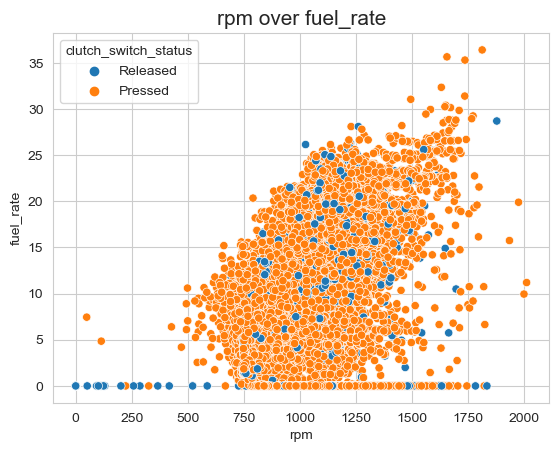

In [413]:
sns.scatterplot(data=final_data, x='rpm', y='fuel_rate', hue='clutch_switch_status' )
plt.title('rpm over fuel_rate', fontsize=15)
plt.xlabel('rpm',fontsize=10)
plt.ylabel('fuel_rate', fontsize=10)

This relationship graph shows that the fuel is burned if the rpm is high which will lead to less performance and more expense as it need vehicle maitainance service , high fuel consumption and fuel rate will go up.

Text(0.5, 0, 'fuel_economy')

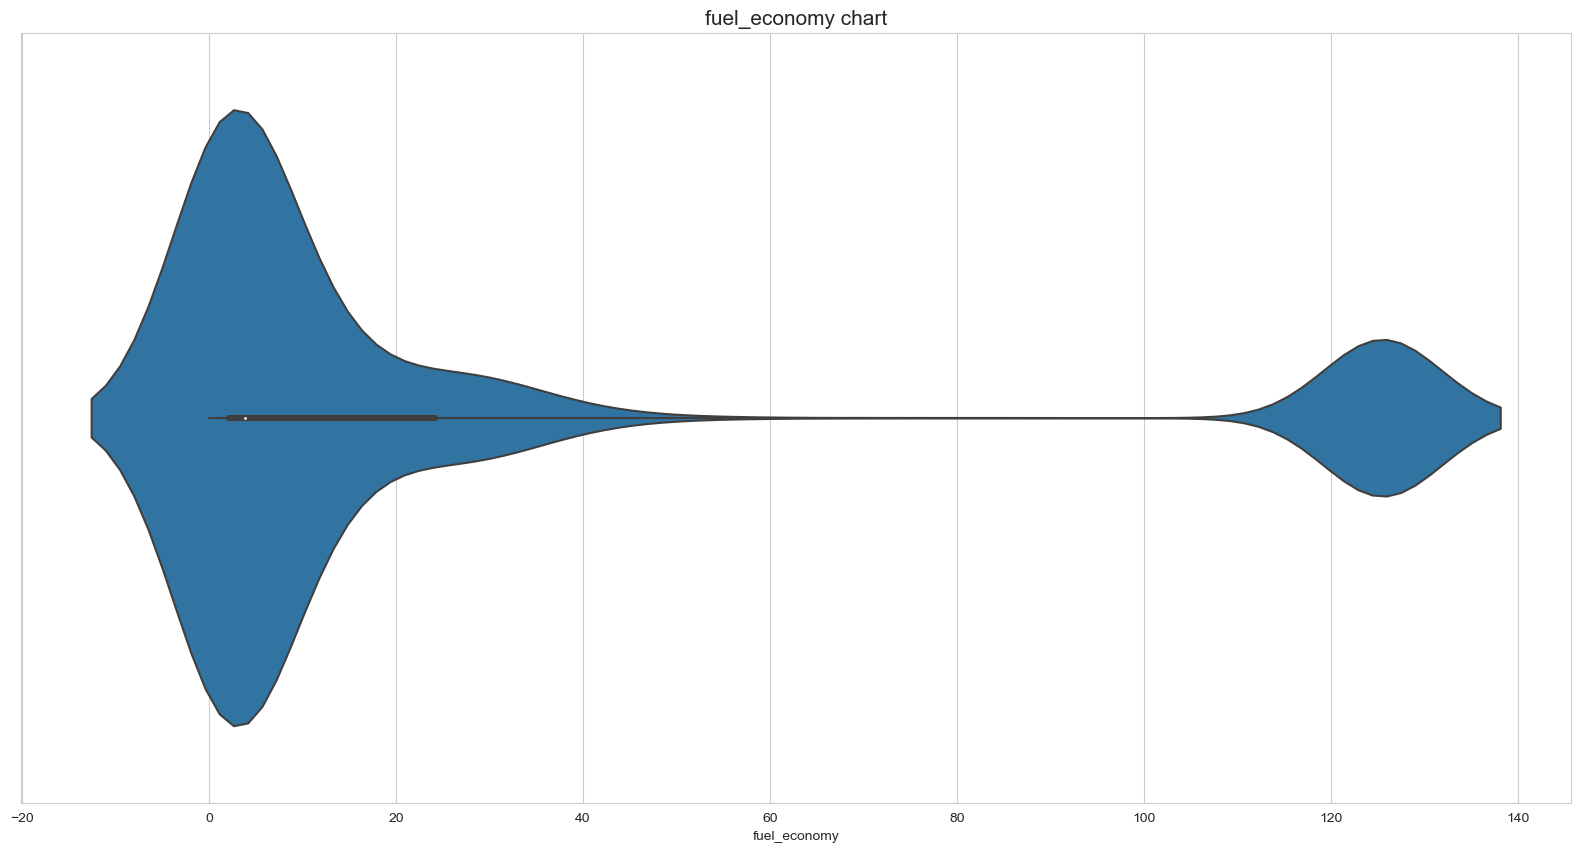

In [414]:
plt.figure(figsize=(20,10))
sns.violinplot(data=final_data,x = 'fuel_economy', hue= 'adblue_level')
plt.title('fuel_economy chart', fontsize=15)
plt.xlabel('fuel_economy',fontsize=10)

Text(0, 0.5, 'fuel_rate')

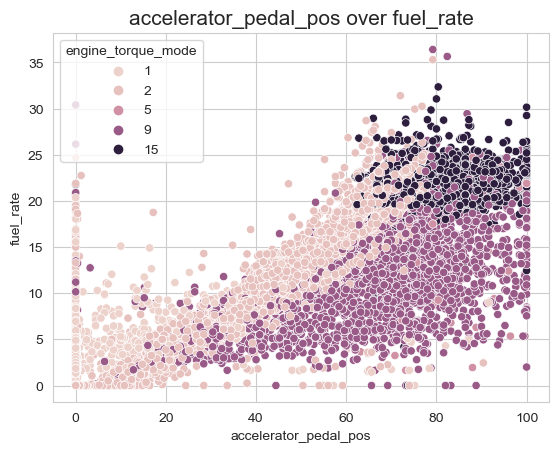

In [415]:
sns.scatterplot(data=final_data, x='accelerator_pedal_pos', y='fuel_rate', hue='engine_torque_mode' )
plt.title('accelerator_pedal_pos over fuel_rate', fontsize=15)
plt.xlabel('accelerator_pedal_pos',fontsize=10)
plt.ylabel('fuel_rate', fontsize=10)

This relationship graph shows that the vehicle is tested on all types of mode and if the acceleration is increased then the fuel rate ll also go up and milage will go down.

Text(0.5, 1.0, 'vehiclespeed over vehiclespeed')

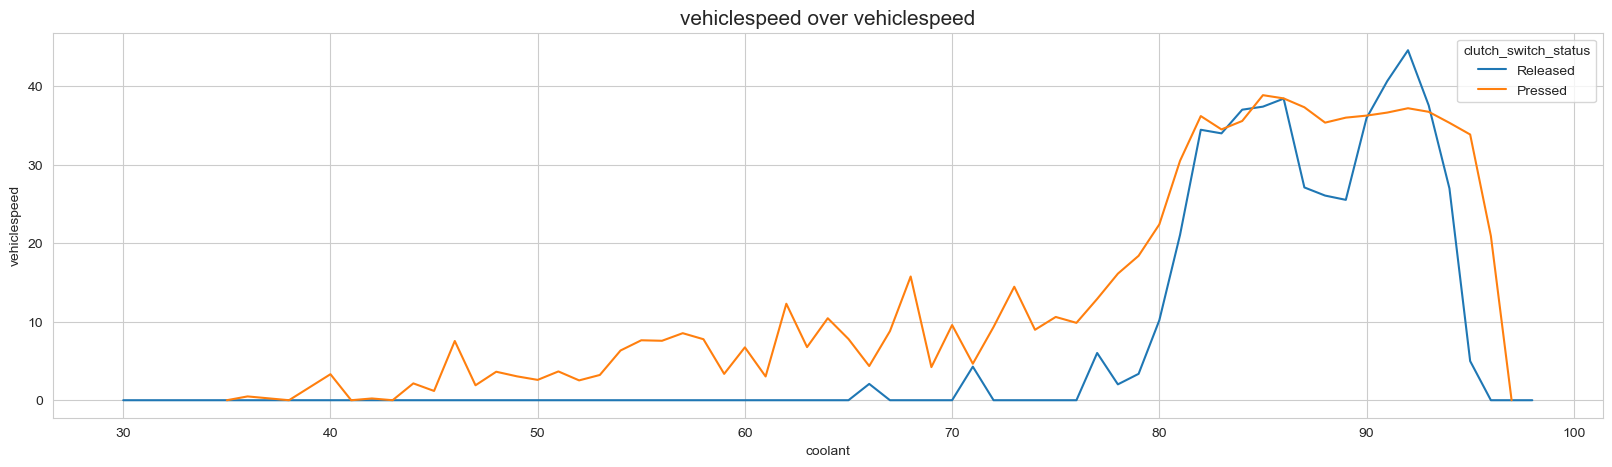

In [416]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
plt.xlabel('coolant',fontsize=10)
plt.ylabel('vehiclespeed', fontsize=10)
sns.lineplot(data= final_data, x='coolant',y='vehiclespeed', hue='clutch_switch_status', errorbar=None)
plt.title('vehiclespeed over vehiclespeed', fontsize=15)

This relationship graph shows that the speed is increasing continously and the coolant is working efficiently. High speed of vehicle leads to better performance of coolant.

Text(0, 0.5, 'drivers_demand_engine_torque_percent')

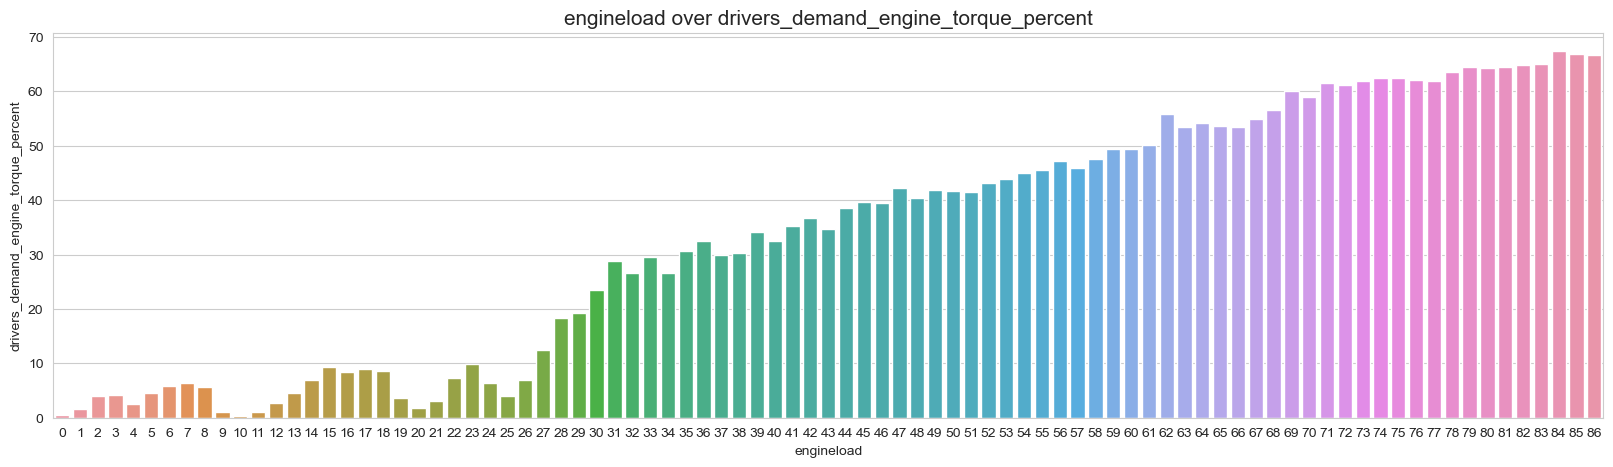

In [417]:
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.barplot(data=final_data, x='engineload',y='drivers_demand_engine_torque_percent', errorbar=None)
plt.title('engineload over drivers_demand_engine_torque_percent', fontsize=15)
plt.xlabel('engineload',fontsize=10)
plt.ylabel('drivers_demand_engine_torque_percent', fontsize=10)

This relationship graph shows that driver need high engine torque to drive the vehicle and trying to get the best of it and that leads to increase in engineload and it ll reduce the milage and increase the regular maintainance.

Univeriate Analysis for Numerical Data

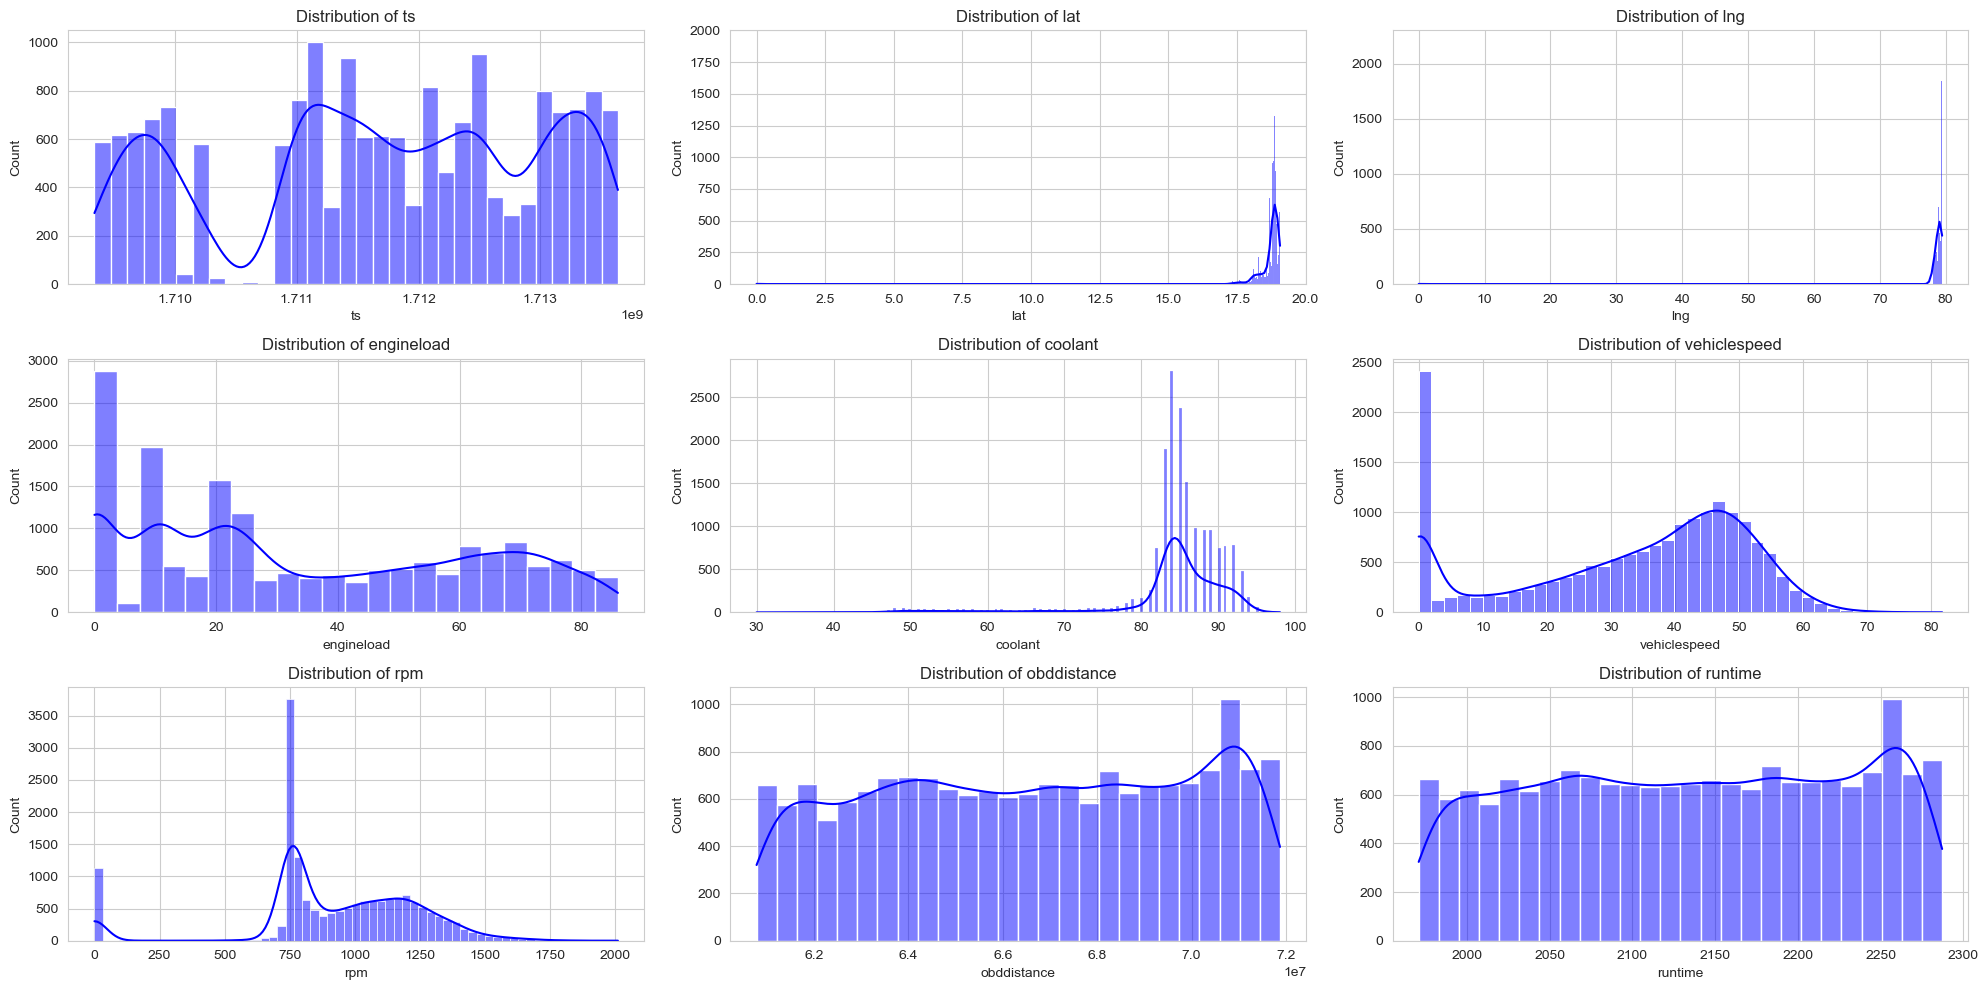

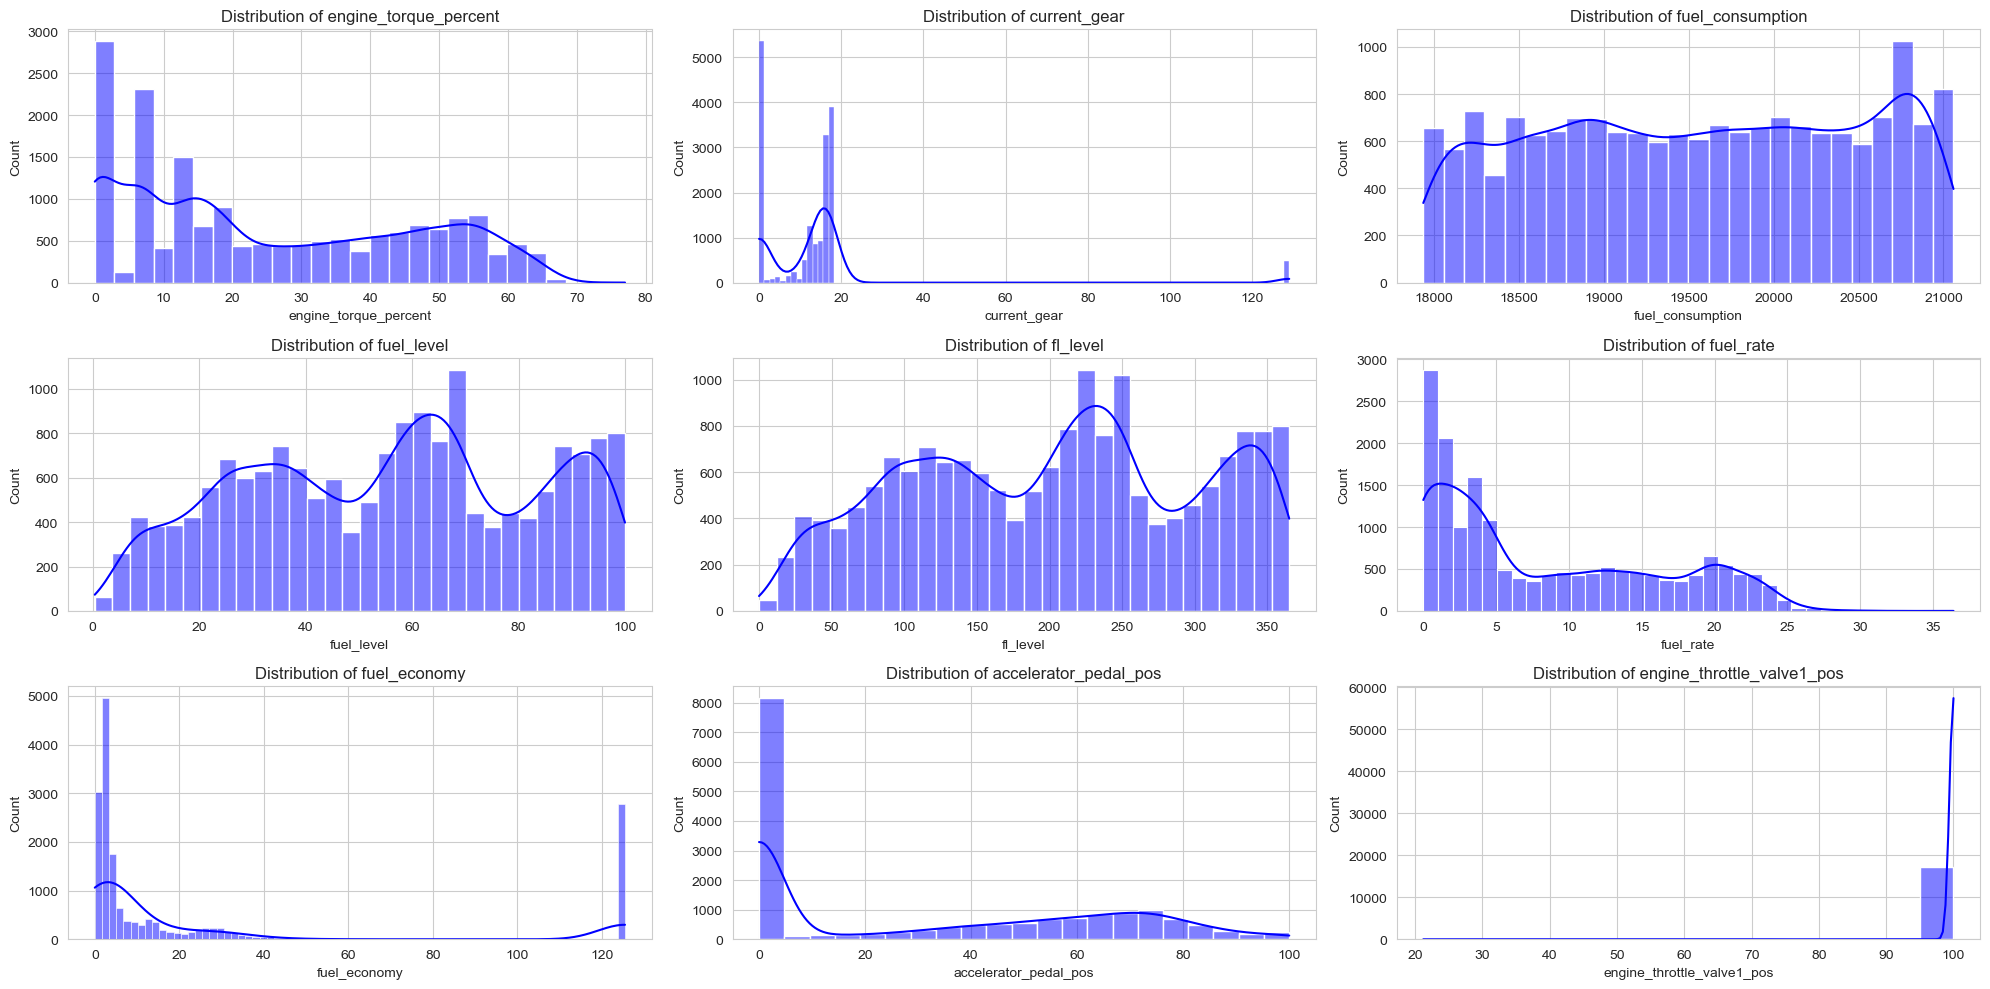

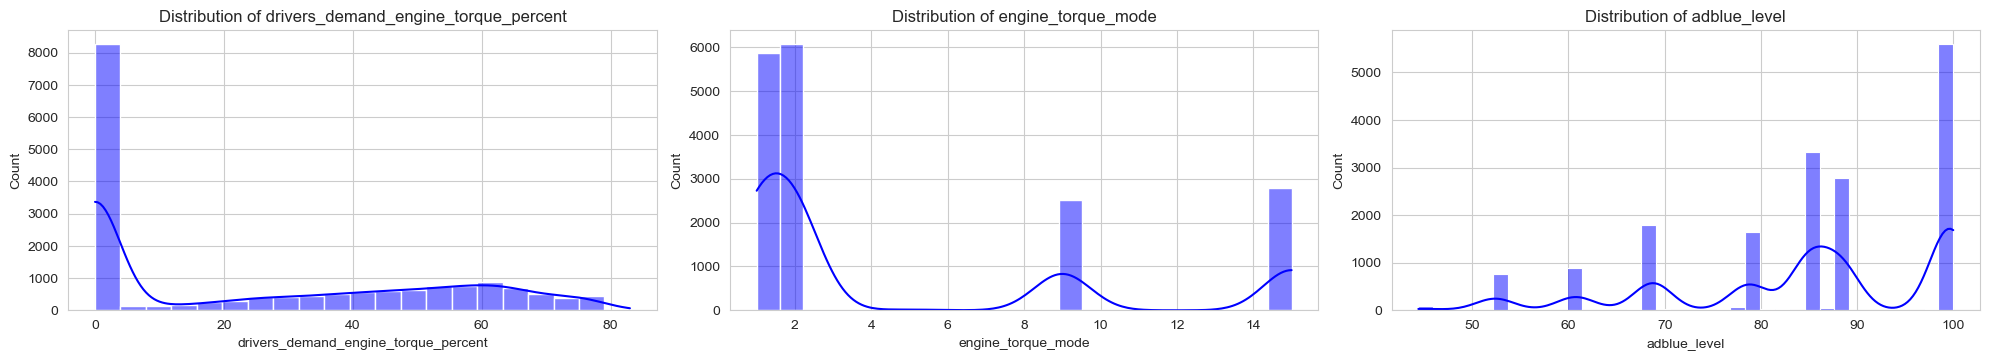

In [418]:
num_col2 = len(num_col1)
batch_size = 9

for i in range(0, num_col2, batch_size):
    plt.figure(figsize=(20, 10))
    for j, col in enumerate(num_col1[i:i + batch_size],1):
        plt.subplot(3, 3, j)
        sns.histplot(final_data[col], kde=True, color = "blue")
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

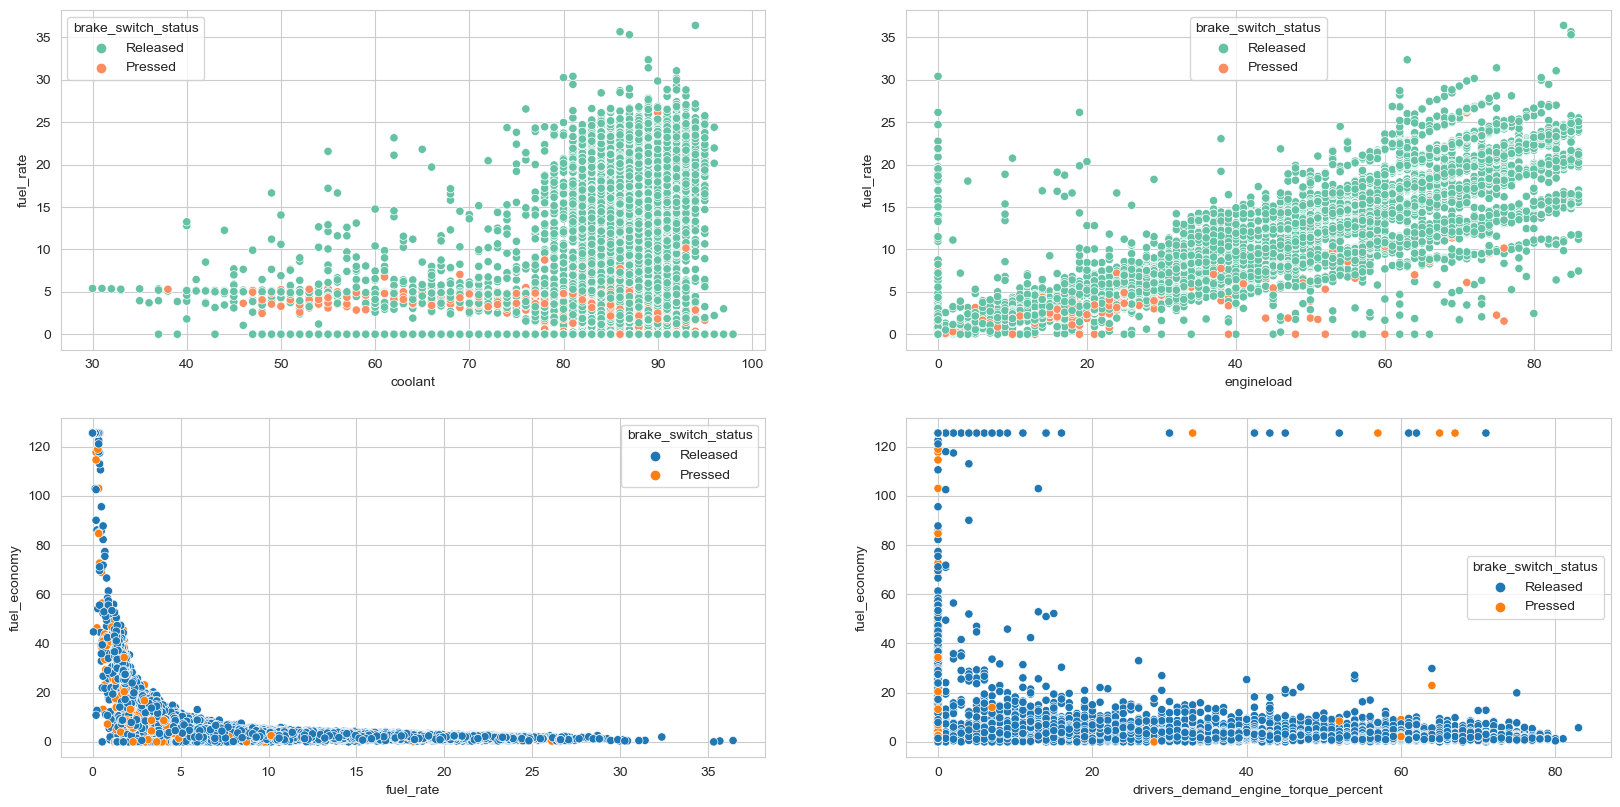

In [419]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.scatterplot(data=final_data,y='fuel_rate',x='coolant', hue='brake_switch_status', palette='Set2')
plt.subplot(3,2,2)
sns.scatterplot(data=final_data,y='fuel_rate',x='engineload', hue='brake_switch_status', palette='Set2')
plt.subplot(3,2,3)
sns.scatterplot(data=final_data,y='fuel_economy',x='fuel_rate', hue='brake_switch_status')
plt.subplot(3,2,4)
sns.scatterplot(data=final_data,y='fuel_economy',x='drivers_demand_engine_torque_percent', hue='brake_switch_status')
plt.show()

Text(0, 0.5, 'vehiclespeed')

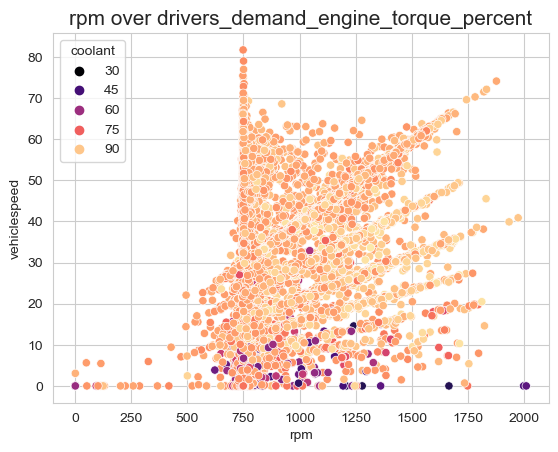

In [420]:
sns.scatterplot(data=final_data, x="rpm", y= "vehiclespeed",hue='coolant',palette='magma')
plt.title('rpm over drivers_demand_engine_torque_percent', fontsize=15)
plt.xlabel('rpm',fontsize=10)
plt.ylabel('vehiclespeed', fontsize=10)

This relationship graph shows that high RPM of a car leads to higher speed of vehicle.

Text(0, 0.5, 'drivers_demand_engine_torque_percent')

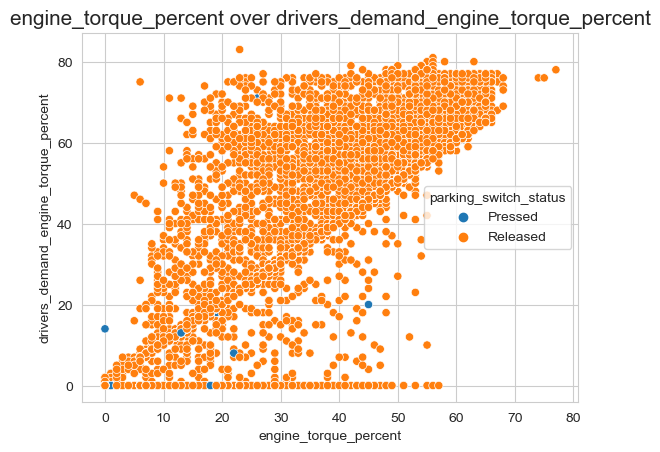

In [421]:
sns.scatterplot(data= final_data, x= 'engine_torque_percent', y= 'drivers_demand_engine_torque_percent', hue="parking_switch_status")
plt.title('engine_torque_percent over drivers_demand_engine_torque_percent', fontsize=15)
plt.xlabel('engine_torque_percent',fontsize=10)
plt.ylabel('drivers_demand_engine_torque_percent', fontsize=10)

This relationship graph shows that drivers demand high engine torque as compare to the default engine torque.

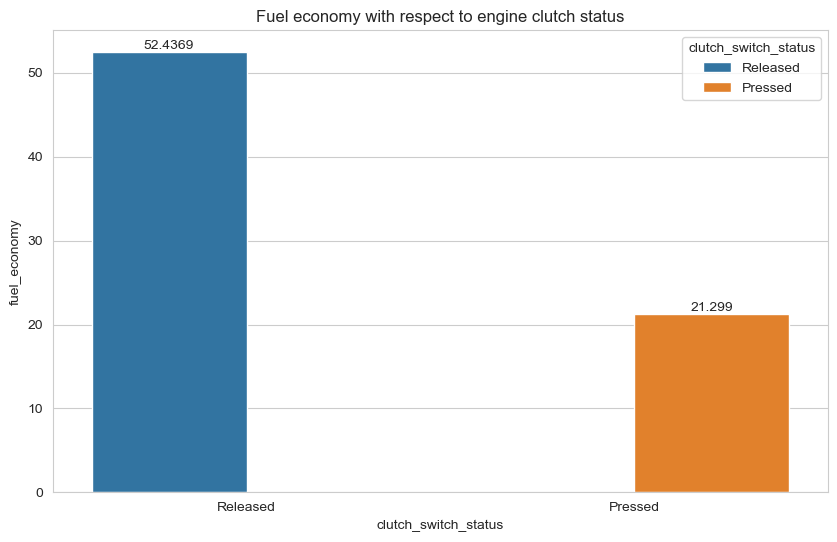

In [422]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=final_data, x='clutch_switch_status', y='fuel_economy',hue='clutch_switch_status', errorbar=None)
plt.title('Fuel economy with respect to engine clutch status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

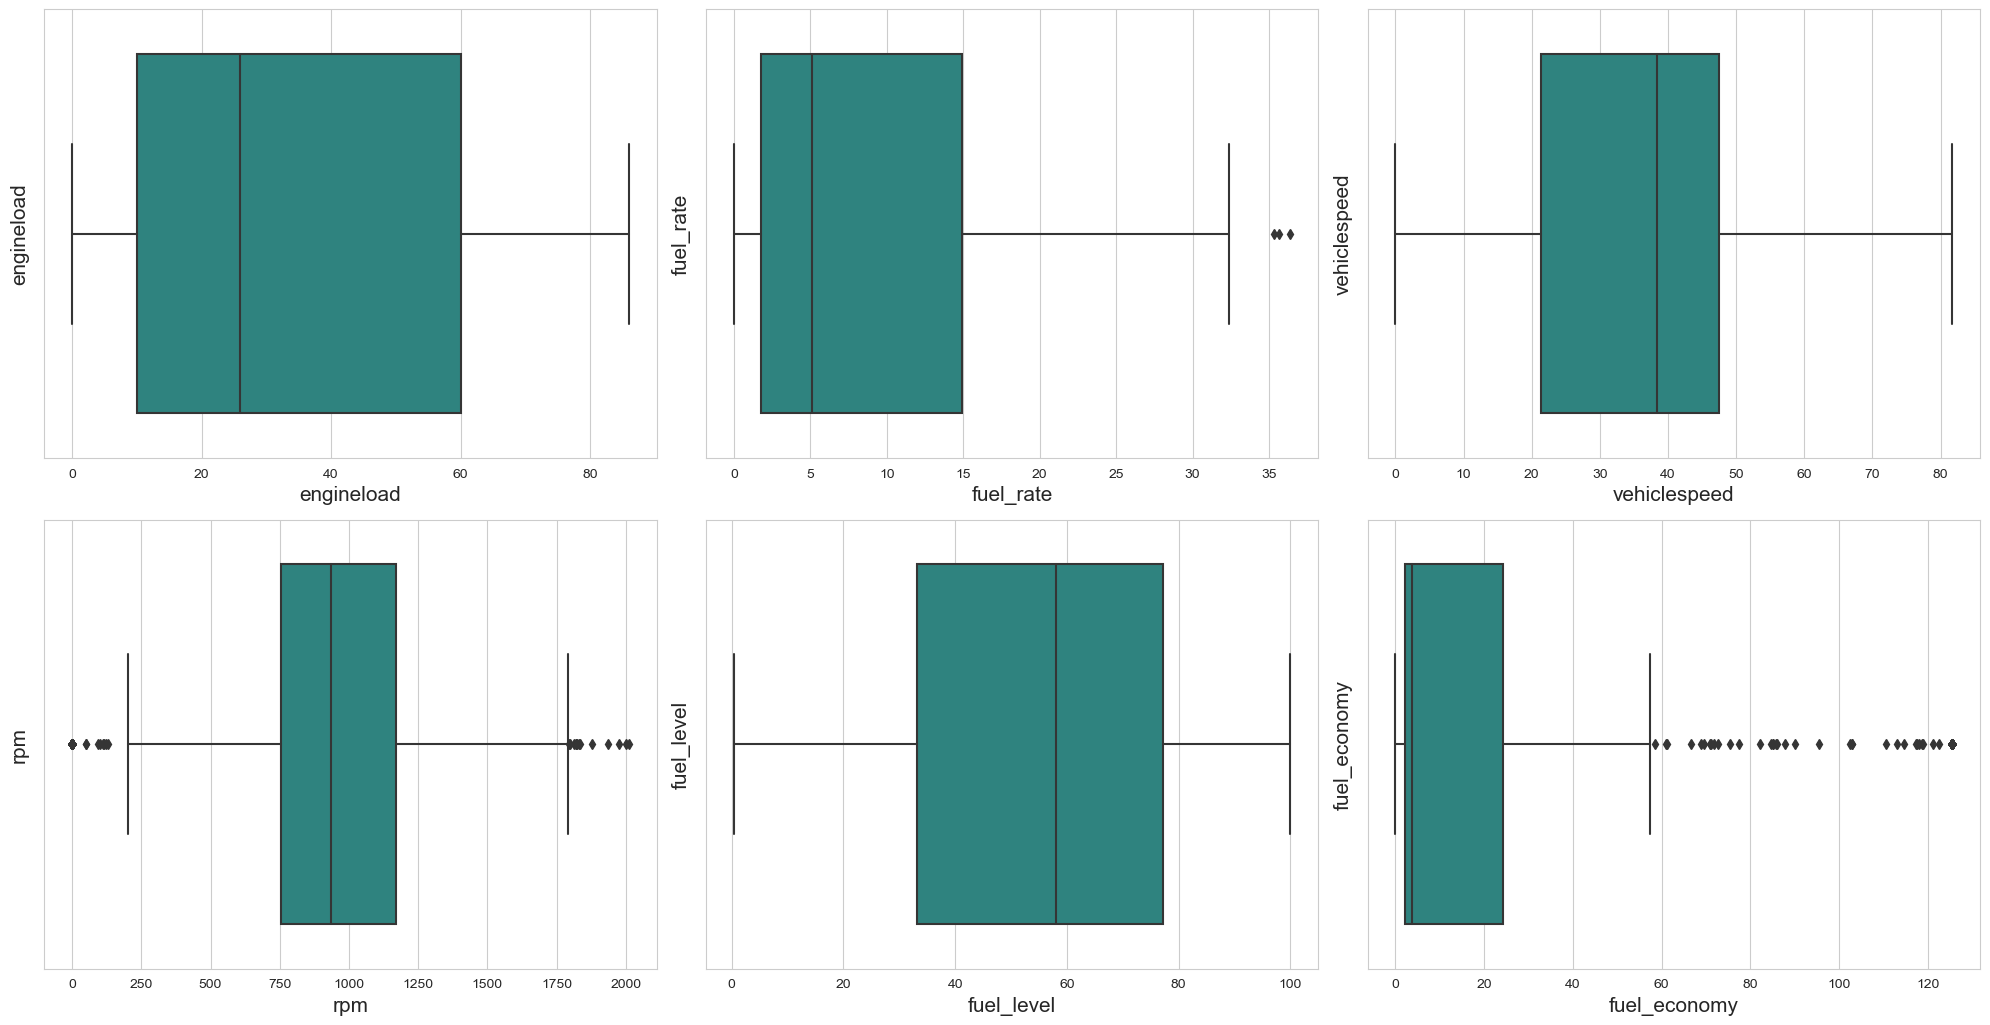

In [423]:
plt.figure(figsize=(20,15))
col= ['engineload','fuel_rate','vehiclespeed','rpm','fuel_level','fuel_economy']
for count,i in enumerate(col):
    plt.subplot(3,3,count+1)
    sns.boxplot(data=final_data, x=i, palette= "viridis")
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()
plt.show()

This boxplot relationship graph shows about the outliers in these columns

# Feature Engineering

In [424]:
## feature engineering
final_data['Milage']= final_data['vehiclespeed']/(final_data['fuel_level']+1)
final_data['time consumed']=final_data['obddistance']/(final_data['vehiclespeed']+1)

In [425]:
final_data.shape

(17292, 26)

# Standardisation

In [426]:
##data standardisation 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_data[num_col1] = scaler.fit_transform(final_data[num_col1])
scaler=round(final_data[num_col1].corr(),3)
final_data.head(10)

,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,Milage,time consumed
0,-1.828663,0.456224,-0.189164,-0.238282,-6.568779,-1.810893,-0.546040,-1.778202,-1.769383,-0.211467,-0.648532,-1.759480,-1.189220,-1.188688,-0.412821,-0.599676,-0.947164,0.089242,-0.919298,-0.728403,Released,Released,Pressed,0.007752,0.000000,6.078080e+07
1,-1.828613,0.456234,-0.189167,-0.460525,-5.543815,-1.810893,0.822662,-1.778202,-1.769383,-0.357787,-0.648532,-1.759480,-1.189220,-1.188688,-0.264517,-0.599676,-0.237901,-0.009237,-0.227080,-0.535823,Released,Pressed,Pressed,0.007752,0.000000,6.078080e+07
2,-1.828564,0.456325,-0.189153,-0.349403,-4.646971,-1.734320,-0.535240,-1.778202,-1.769383,-0.357787,5.581299,-1.758935,-1.219119,-1.218579,-0.490197,-0.592048,-0.947164,-0.009237,-0.919298,-0.728403,Pressed,Pressed,Released,0.007752,0.059086,2.525955e+07
3,-1.828514,0.456113,-0.189137,0.021001,-4.134489,-1.657746,0.191010,-1.778196,-1.768841,0.081173,5.581299,-1.758935,-1.308814,-1.308252,0.012748,-0.596942,0.062634,-0.009237,0.100813,-0.535823,Released,Pressed,Released,0.007752,0.131425,1.594251e+07
4,-1.828465,0.455890,-0.189097,-1.275414,-3.493886,-1.564156,0.397712,-1.778190,-1.768841,-1.186934,-0.503652,-1.758935,-1.204169,-1.203633,-1.096309,2.233423,-0.850992,0.089242,-0.882866,-0.535823,Released,Pressed,Released,0.007752,0.187242,1.098863e+07
5,-1.827881,0.455921,-0.188837,-0.460525,-3.365765,-1.805788,-0.540826,-1.778165,-1.768300,-0.260240,5.581299,-1.758935,-1.249017,-1.248470,-0.451509,-0.590946,-0.947164,-0.009237,-0.919298,-0.728403,Released,Pressed,Released,0.007752,0.004076,5.557113e+07
6,-1.825595,0.455975,-0.188847,-1.275414,-4.006368,-1.810893,-2.777677,-1.778165,-1.768300,-1.235708,-0.648532,-1.758935,-1.204169,-1.203633,-1.096309,2.233423,-0.947164,0.089242,-0.919298,1.967727,Released,Released,Pressed,0.007752,0.000000,6.078092e+07
7,-1.825546,0.455970,-0.188847,-1.275414,-4.006368,-1.810893,-2.777677,-1.778165,-1.768300,-1.235708,-0.648532,-1.758935,-1.204169,-1.203633,-1.096309,2.233423,-0.947164,0.089242,-0.919298,1.967727,Released,Pressed,Pressed,0.007752,0.000000,6.078092e+07
8,-1.825496,0.455890,-0.188850,-1.275414,-4.006368,-1.810893,-2.777677,-1.778165,-1.768300,-1.235708,-0.648532,-1.758935,-1.204169,-1.203633,-1.096309,2.233423,-0.947164,0.089242,-0.919298,1.967727,Released,Released,Pressed,0.007752,0.000000,6.078092e+07
9,-1.825447,0.455954,-0.188866,-1.275414,-4.134489,-1.810893,-2.777677,-1.778165,-1.768300,-1.235708,-0.648532,-1.758935,-1.204169,-1.203633,-1.096309,2.233423,-0.947164,0.089242,-0.919298,1.967727,Released,Released,Pressed,0.007752,0.000000,6.078092e+07
